# ML Model

In [1]:
# importing important modules
from sklearn.model_selection import train_test_split
from sklearn. preprocessing import StandardScaler
from sklearn. decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

# Pipeline in SkLearn

In [2]:
# Load dataset
df= pd.read_csv('../data/scaled_data.csv')
df.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.335706,-2.183545,1.526900,1.477828,1.708051,-0.152054,-0.283578,2.887302,2.646196,2.837042,...,-1.400167,2.761488,-0.224151,1.429505,-0.206236,2.497158,2.296076,0.002570,2.739080,1
1,2.168713,-0.336098,1.999151,2.692856,-0.858619,-0.466377,0.107062,0.680991,0.084394,-0.938952,...,-0.357761,1.873778,-0.224151,-0.369836,-0.404542,-0.084360,1.087084,-0.152067,0.548993,1
2,1.884587,0.533878,1.863554,2.233014,1.037027,1.359343,1.809179,2.336656,1.169045,-0.370155,...,0.005710,1.657012,2.425960,0.595436,1.460157,1.061762,1.955000,1.701432,0.443446,1
3,-0.785558,0.316384,-0.587475,-0.821005,-0.009925,-0.152054,2.486945,1.685632,-0.000015,-0.104601,...,0.172015,-0.188255,-0.532056,-0.018402,-0.206236,2.359931,2.175786,0.002570,-0.109206,1
4,2.078309,-1.193573,2.102017,2.584438,0.327875,0.750470,1.818421,1.659821,0.071733,-0.568891,...,-1.513323,1.646690,2.078659,0.267431,-0.260319,0.785112,0.729259,-0.981094,-0.348151,1


In [4]:
df.columns.shape

(31,)

In [5]:
# Features from Casual Graph
casual_features = ['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'concavity_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst']

# Pipeline Using the whole Data

In [6]:
X= df.iloc[:,0:30]
y= df['diagnosis']

print('X shape',X.shape)
print('y shape',y.shape)

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=20, random_state= 30)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X shape (569, 30)
y shape (569,)
X_train shape (549, 30)
X_test shape (20, 30)
y_train shape (549,)
y_test shape (20,)


# Logistic Regression

In [7]:
# Pipeline Logistic Regression: 

pipeline_lr = Pipeline([
    ('scaler1',StandardScaler()),
    ('pca1', PCA(n_components=2)),
    ('lr_classifier', LogisticRegression(random_state=0))
])

<AxesSubplot:>

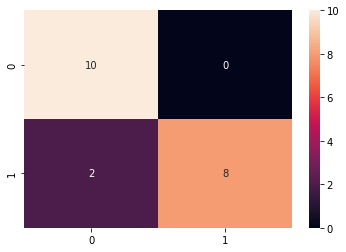

In [16]:
from sklearn.metrics import f1_score,confusion_matrix
import seaborn as sns
cm_2 = confusion_matrix(y_test,pipeline_lr.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")

# Decision Tree Classifier

In [8]:
# Pipeline Decision Tree Classifier:

pipeline_dtc= Pipeline([
    ('scaler2', StandardScaler()),
    ('pca2', PCA(n_components=2)),
    ('dt_classifier', DecisionTreeClassifier())
])

<AxesSubplot:>

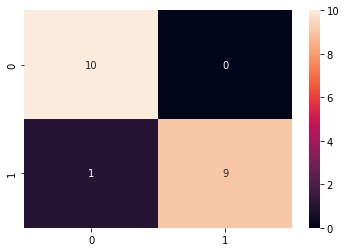

In [17]:
from sklearn.metrics import f1_score,confusion_matrix
import seaborn as sns
cm_2 = confusion_matrix(y_test,pipeline_dtc.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")

# Random Forest Classifier

In [9]:
# Pipeline Random Forest Classifier:

pipeline_rfc = Pipeline([
    ('scaler3', StandardScaler()),
    ('pca2', PCA(n_components=3)),
    ('rf_classifier', RandomForestClassifier())
])

<AxesSubplot:>

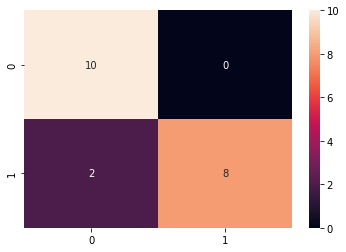

In [18]:
from sklearn.metrics import f1_score,confusion_matrix
import seaborn as sns
cm_2 = confusion_matrix(y_test,pipeline_rfc.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")

In [10]:
# Make the list of pipeline: 

pipeline = [pipeline_lr,pipeline_dtc,pipeline_rfc]

best_accuracy = 0.0
best_classifier= 0
best_pipeline = ""

In [11]:
# Dictionary of pipeline and classifier types for ease of reference:

pipe_dict = { 0: 'Logistic Regression', 1: 'Decision Tree', 2:'RandomForest'}

# fit the pipleline 
for pipe in pipeline:
    pipe.fit(X_train, y_train)

In [12]:
for i, model in enumerate(pipeline):
    print('{} Test Accuracy: {}'.format(pipe_dict[i],model.score(X_test, y_test)))

Logistic Regression Test Accuracy: 0.9
Decision Tree Test Accuracy: 0.95
RandomForest Test Accuracy: 0.9


In [13]:
for i, model in enumerate(pipeline):
    if model.score(X_test, y_test) > best_accuracy:
        best_accuracy= model.score(X_test, y_test)
        best_pipeline= model
        best_classifier= i
print('classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

classifier with best accuracy:Decision Tree


# Pipeline Using features extracted from casual graph